### 목표 설정
1. 코드에서 압축 파일 다루는 법을 알아보자
2. 정답이 없는 이미지 파일의 정답을 추가해보자
3. NPZ 파일을 만들어보자


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 드라이브 위치 확인
!pwd

/content/drive/MyDrive/Colab Notebooks/딥러닝


In [2]:
# 드라이브 위치 변경
%cd /content/drive/MyDrive/Colab Notebooks/딥러닝

/content/drive/MyDrive/Colab Notebooks/딥러닝


In [4]:
# 필요한 라이브러리 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# 압축된 파일을 가져와서 압축을 풀어주자
from zipfile import ZipFile

zip_file = 'data/cats_and_dogs_filtered.zip' # 압축파일 경로 잡아주기

with ZipFile(zip_file, 'r') as z :
  z.extractall(path = 'data/')
  # extractall -> 전체 파일 압축 해제
  # path -> 압축을 해제하는 경로 설정

### 이미지 파일을 NPZ 파일로 변환시켜주자
**NPZ 파일로 바꿔주는 이유**
- 데이터가 복잡하고 양이 많다면 클라우드 환경(구글 코랩 / 구글 드라이브) 데이터를 업로드하는데 매우 오랜 시간이 걸린다.
- 볼륨이 큰 이미지 데이터를 로컬환경(파이참 / 주피터 노트북)에서 빠르게 전처리 해주고 결과를 NPZ(numpy zip) 파일로 저장해서 빠르게 업로드 및 사용할 수 있도록 만들어줄 필요가 있다.
- NPZ 파일을 가지고 원하는 환경에 편하게 가지고 가서 데이터를 활용할 수 있다.

In [7]:
# os 라이브러리 / Image 라이브러리 호출
import os
from PIL import Image

In [9]:
# 이미지 접근을 위한 경로 설정
# 기본 경로 설정
base_dir = 'data/cats_and_dogs_filtered'

# os.path.join() -> 파일의 경로 결합
train_dir_cats = os.path.join(base_dir, 'train/cats')
train_dir_dogs = os.path.join(base_dir, 'train/dogs')
test_dir_cats = os.path.join(base_dir, 'test/cats')
test_dir_dogs = os.path.join(base_dir, 'test/dogs')

In [10]:
train_dir_cats

'data/cats_and_dogs_filtered/train/cats'

In [11]:
# os.listdir() -> list directory -> 해당 경로에 있는 파일명들을 리스트에 순서대로 저장
train_cats_fname = os.listdir(train_dir_cats)
train_dogs_fname = os.listdir(train_dir_dogs)
test_cats_fname = os.listdir(test_dir_cats)
test_dogs_fname = os.listdir(test_dir_dogs)

In [18]:
train_cats_fname[:5]

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg']

In [19]:
# 파일 이름과 경로 결합 테스트
test_path = os.path.join(train_dir_cats, train_cats_fname[0])
test_path

'data/cats_and_dogs_filtered/train/cats/cat.0.jpg'

array([[[203, 164,  87],
        [205, 166,  89],
        [209, 170,  93],
        ...,
        [245, 204, 120],
        [242, 202, 122],
        [239, 200, 121]],

       [[203, 164,  87],
        [205, 166,  89],
        [209, 170,  93],
        ...,
        [245, 204, 121],
        [242, 203, 123],
        [240, 201, 122]],

       [[203, 164,  87],
        [205, 166,  89],
        [209, 170,  93],
        ...,
        [245, 205, 122],
        [243, 204, 124],
        [241, 202, 123]],

       ...,

       [[154, 123,  56],
        [155, 124,  57],
        [156, 125,  58],
        ...,
        [  3,   3,   1],
        [  3,   3,   1],
        [  3,   3,   1]],

       [[153, 122,  55],
        [153, 122,  55],
        [154, 123,  56],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[151, 120,  53],
        [152, 121,  54],
        [153, 122,  55],
        ...,
        [  1,   1,   0],
        [  1,   1,   0],
        [  1,   1,   0]]], dtype=uint8)
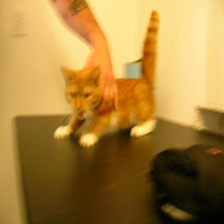

In [22]:
# 이미지 사이즈 조정 및 배열로 변환
img_shape = (224, 224)
img = Image.open(test_path)
img = img.resize(img_shape)
np.array(img)

In [23]:
# 사진을 불러와서 배열로 변경하는 함수를 만들어보자!
def load_image(folder_path, file_name, img_size_shape=(224,224)):
  imgs = []

  for i in file_name :
    # 폴더 경로 + 파일명
    path = os.path.join(folder_path, i)
    # 파일 오픈 후 크기 조정
    img = Image.open(path).resize(img_size_shape)
    # 넘파이 배열 변환
    np_img = np.array(img)
    # list에 저장
    imgs.append(np_img)

  return np.array(imgs)

In [24]:
# 변수 설정 후 파일을 저장하고 형태를 파악해보자
X_train_cats = load_image(train_dir_cats, train_cats_fname)
X_train_dogs = load_image(train_dir_dogs, train_dogs_fname)
X_test_cats = load_image(test_dir_cats, test_cats_fname)
X_test_dogs = load_image(test_dir_dogs, test_dogs_fname)

In [26]:
X_train_cats.shape, X_train_dogs.shape, X_test_cats.shape, X_test_dogs.shape

((1000, 224, 224, 3),
 (1000, 224, 224, 3),
 (500, 224, 224, 3),
 (500, 224, 224, 3))